<h1>Sampling and Statistical Inference<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Import-and-Review-California-Housing-Data" data-toc-modified-id="1.-Import-and-Review-California-Housing-Data-1">1. Import and Review California Housing Data</a></span></li><li><span><a href="#2.-Simple-Random-Sample" data-toc-modified-id="2.-Simple-Random-Sample-2">2. Simple Random Sample</a></span></li><li><span><a href="#3.-Point-Estimations" data-toc-modified-id="3.-Point-Estimations-3">3. Point Estimations</a></span></li><li><span><a href="#4.-Sampling-Distribution" data-toc-modified-id="4.-Sampling-Distribution-4">4. Sampling Distribution</a></span><ul class="toc-item"><li><span><a href="#4.1-Distribution-of-Sample-Mean" data-toc-modified-id="4.1-Distribution-of-Sample-Mean-4.1">4.1 Distribution of Sample Mean</a></span></li><li><span><a href="#4.2-Distribution-of-Sample-Variance" data-toc-modified-id="4.2-Distribution-of-Sample-Variance-4.2">4.2 Distribution of Sample Variance</a></span></li><li><span><a href="#4.3-Distribution-of-Sample-Proportion" data-toc-modified-id="4.3-Distribution-of-Sample-Proportion-4.3">4.3 Distribution of Sample Proportion</a></span></li></ul></li><li><span><a href="#5.-Interval-Estimation" data-toc-modified-id="5.-Interval-Estimation-5">5. Interval Estimation</a></span><ul class="toc-item"><li><span><a href="#5.1-Interval-Estimation-for-Sample-Mean" data-toc-modified-id="5.1-Interval-Estimation-for-Sample-Mean-5.1">5.1 Interval Estimation for Sample Mean</a></span></li><li><span><a href="#5.2-Interval-Estimation-of-Sample-Proportion" data-toc-modified-id="5.2-Interval-Estimation-of-Sample-Proportion-5.2">5.2 Interval Estimation of Sample Proportion</a></span></li></ul></li><li><span><a href="#6.-Estimation-of-Nonparametric-Distribution" data-toc-modified-id="6.-Estimation-of-Nonparametric-Distribution-6">6. Estimation of Nonparametric Distribution</a></span></li></ul></div>

In [1]:
# If you use Colab Notebook, you can uncomment the following to mount your Google Drive to Colab
# After that, your colab notebook can read/write files and data in your Google Drive

#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
# If you use Colab Notebook, please change the current directory to be the folder that you save 
# your Notebook and data folder for example, I save my Colab files and data in the following location

#%cd /content/drive/MyDrive/Colab\ Notebooks

In [3]:
# you might need to uninstall and reintall scipy to update the version
#!pip uninstall scipy
#!pip install scipy

In [4]:
# import libraries and modules to be used
import numpy as np 
np.random.seed(12345)
np.set_printoptions(precision=4, suppress=True)

import pandas as pd
from pandas import Series, DataFrame # import modules into the local namespace if they are frequently used
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20
pd.options.display.max_colwidth = 80

import matplotlib.pyplot as plt
plt.rc("figure", figsize=(12, 8))

import seaborn as sns

import scipy as sp
from scipy import stats # we'll use the stats module of scipy

# to display multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# 1. Import and Review California Housing Data

CA_housing.csv dataset pertains to the houses found in a given California
district and some summary stats about them based on the 1990 census data.
The dataset contains 20640 observations and 10 columns

Below is a list of the 9 attributes (X) with their discription

  --Longitude: block group longitude\
  --Latitude block group latitude\
  --HouseAge: median house age in block group\
  --AveRooms: average number of rooms per household\
  --AveBedrms: average number of bedrooms per household\
  --Population: block group population\
  --AveOccup: average number of household members\
  --MedInc: Median income for households within a block\
  --OceanProx: Location of the house w.r.t ocean/sea

The target (y) is:\
--MedVal: Median house value for households within a block


Suggested Exercises:
1. read the dataset CA_housing.csv into your workspace as a DadaFrame
2. Review the first few rows and develop an understanding of the dataset [either use .head() or .info()]
3. Visualize the distributions of numerical variables as historgrams. What observations do you have?
4. Calculate the distribution of the categorical variables using .value_counts(). What observations do you have?
5. Please show the geographical distribution of houses in CA. Color data points according to the median house value. Do you observe any patterns about the median value of houses in CA? [Hint: scatter plot of data points using longtitude and lattitude]. 
6. Please show the geographical distriubtion of houses in CA. Color data points according to the proximity to the ocean. 
7. According to the result in step 6, can you change OceanProx into an ordered categorical variable according the proximity to the ocean? Then, redo the geographical distribution of houses in step 6.


In [5]:
# read the Housing dataset
CA_housing=pd.read_csv("Data/CA_housing.csv")

# review the first five rows
CA_housing.head()

# review information about the dataset
CA_housing.info()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,OceanProx,MedVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,NEAR BAY,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,NEAR BAY,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,NEAR BAY,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,NEAR BAY,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,NEAR BAY,342200.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   OceanProx   20640 non-null  object 
 9   MedVal      20640 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


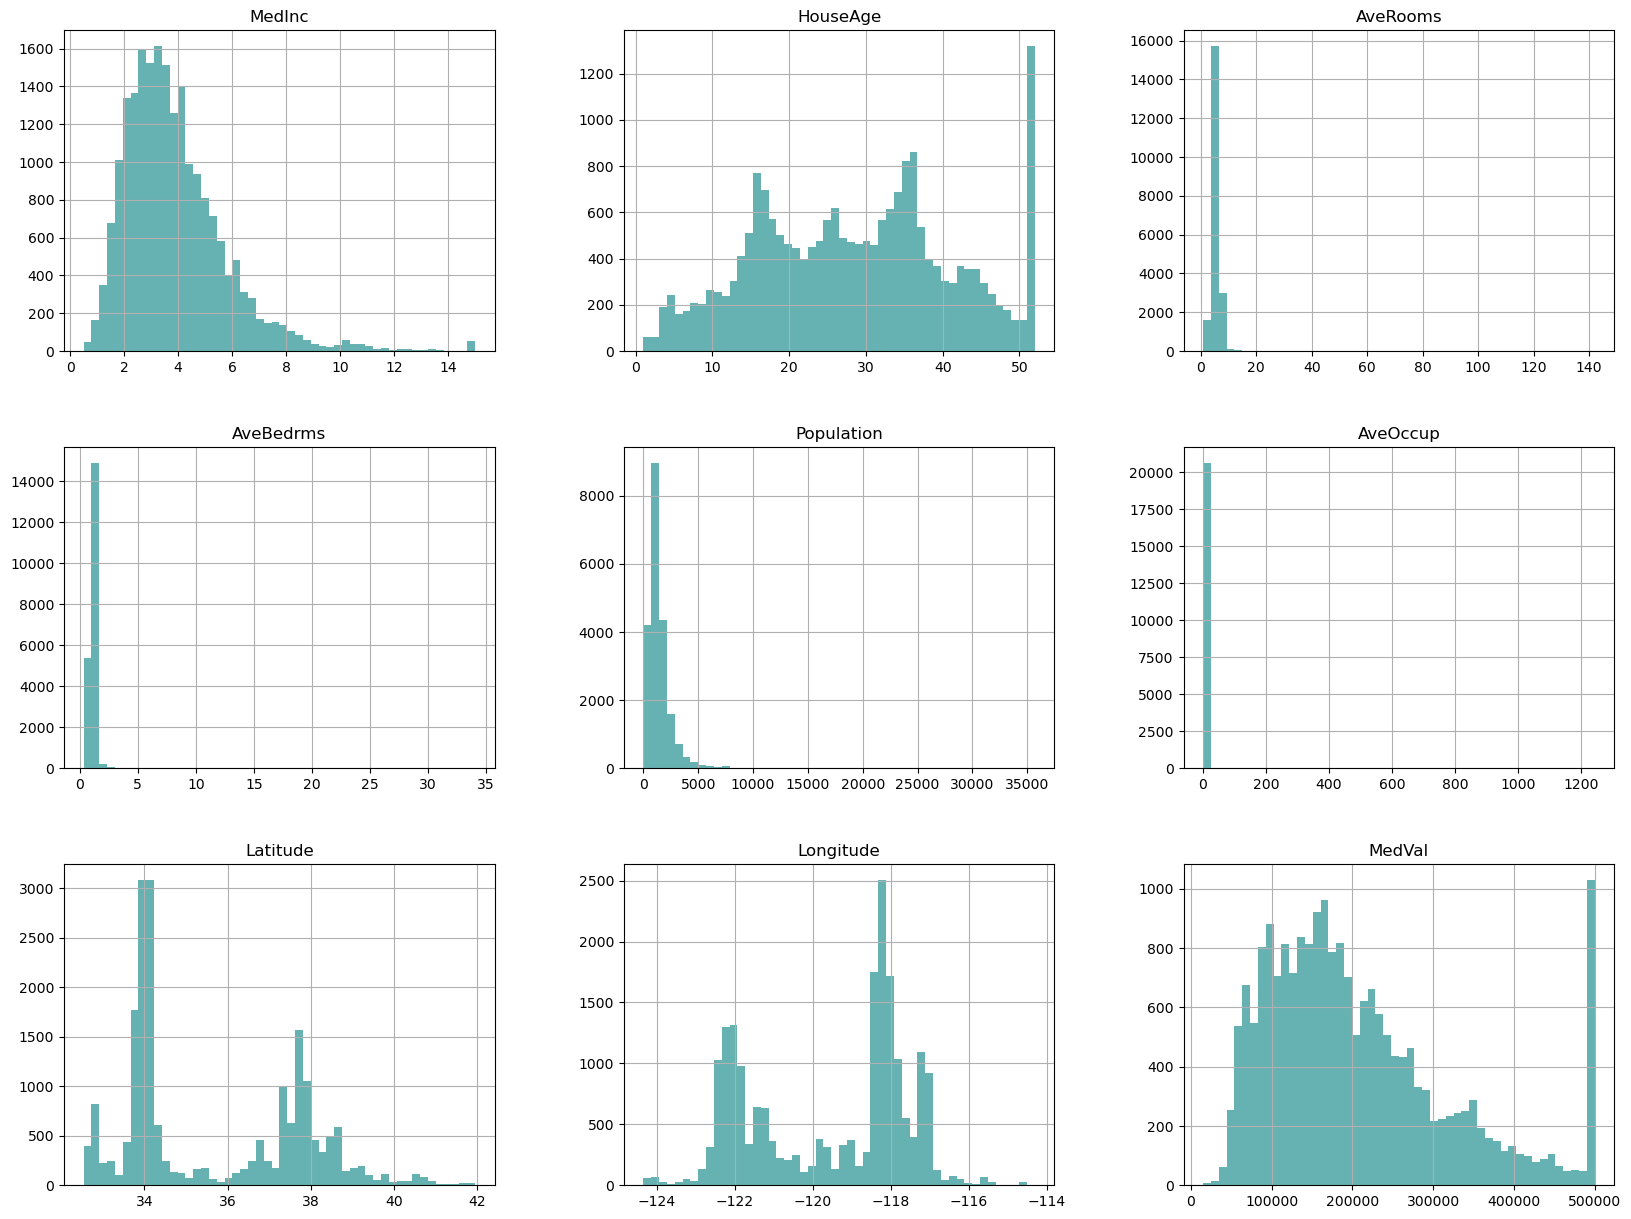

In [6]:
# show the distributions of the nine numerical columns
CA_housing.hist(bins=50, figsize=(20,15),color='teal',alpha=0.6)
plt.show();

In [7]:
# OceanProx is a categorical attribute. Let's take a look at its distribution
CA_housing["OceanProx"].value_counts()

OceanProx
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

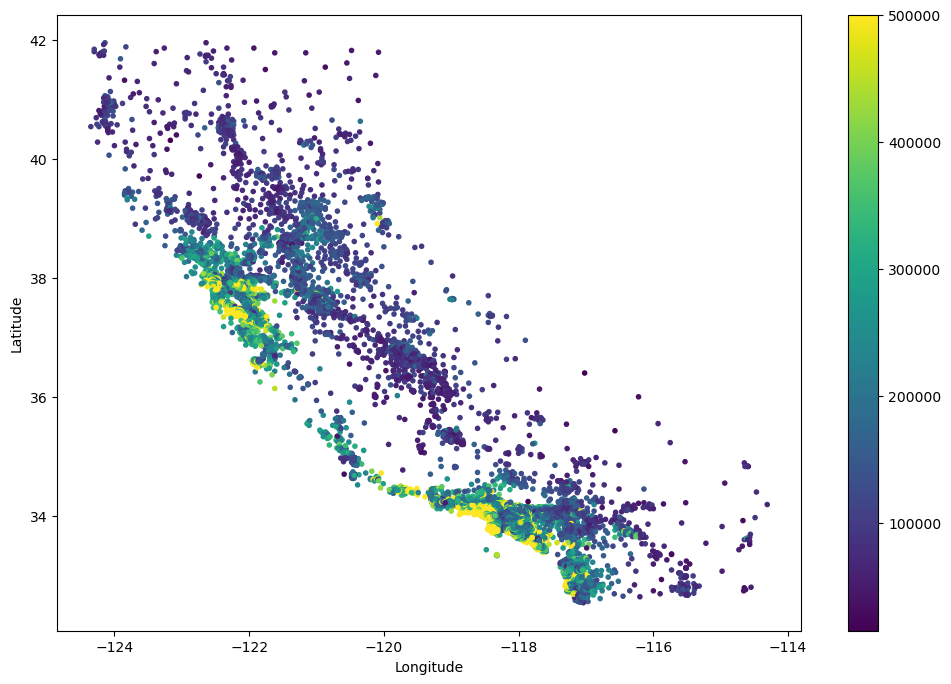

In [8]:
# Let's take a look at the spatial distribution of the data. We use color to indicate the median house value

plt.figure(figsize=(12,8))
plt.scatter(x=CA_housing.Longitude, 
            y=CA_housing.Latitude, 
            c=CA_housing.MedVal,
            cmap='viridis',
            marker='.')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar() # displays the colorbar
plt.show();

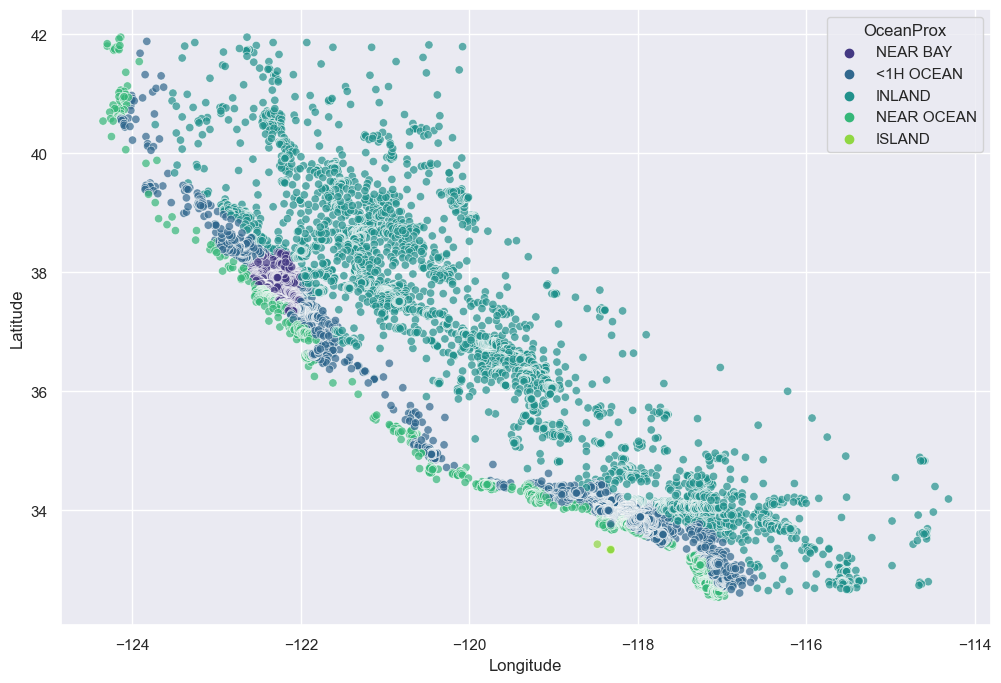

In [9]:
#Let's take a look at the spatial distribution of the data. We use color to indicate the proximity to the ocean
sns.set_theme(rc={'figure.figsize':(12,8)})

sns.scatterplot(x=CA_housing.Longitude,
                y=CA_housing.Latitude,
                hue=CA_housing.OceanProx,
                palette ='viridis',
                alpha=0.7,
                legend='brief') 

plt.show();

In [10]:
ordered_categories = ['INLAND', 'NEAR BAY', '<1H OCEAN', 'NEAR OCEAN', 'ISLAND']
CA_housing['OceanProx'] = pd.Categorical(CA_housing['OceanProx'], 
                                         categories=ordered_categories, 
                                         ordered=True)

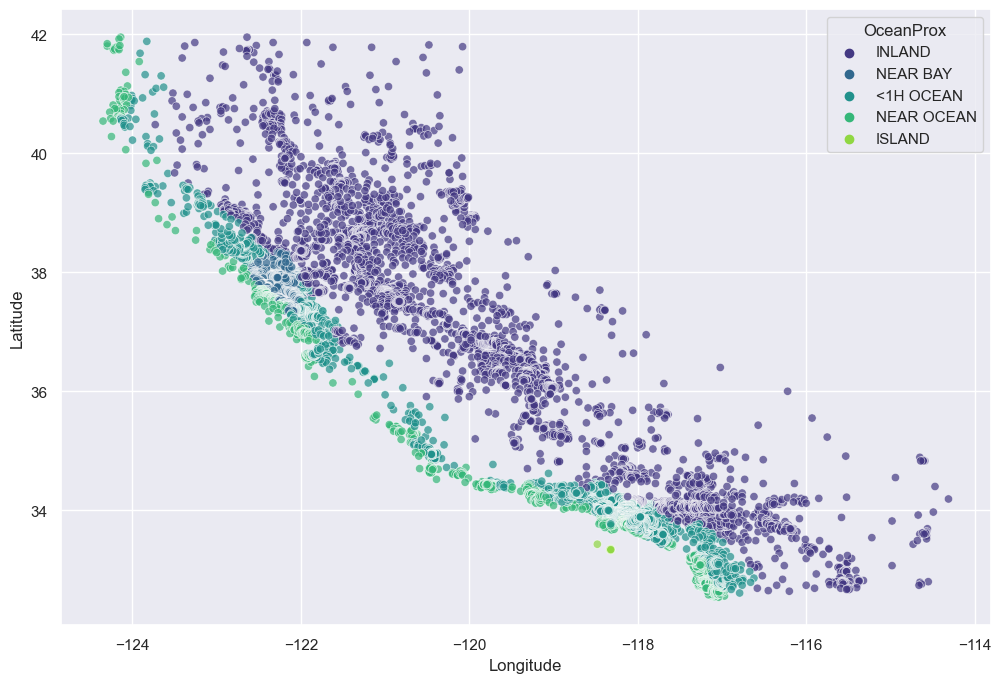

In [11]:
#Let's take a look at the spatial distribution of the data. We use color to indicate the proximity to the ocean
sns.set_theme(rc={'figure.figsize':(12,8)})

sns.scatterplot(x=CA_housing.Longitude,
                y=CA_housing.Latitude,
                hue=CA_housing.OceanProx,
                palette ='viridis',
                alpha=0.7,
                legend='brief') 

plt.show();

# 2. Simple Random Sample

Suggested Exercise

1. generate a random sample of size 1000 without replacement [hint: .sample(samplesize,replace=False)]


In [12]:
# Generate a random sample of size 1,000 without replacement)
sample_size = 1_000
pul_size = CA_housing.shape[0]

X = CA_housing.sample(sample_size,replace=False)

# 3. Point Estimations

Suggested Exercises:

1. Estimate the sample mean and sample standard deviation for the log function of MedInc, based on a random sample of size 1,000. [Hint: using .mean() and .std()]
2. Estimate the sample proportion of survey boccks that are "NEAR OCEAN". 

In [13]:
# Let's study the attribute log(MedInc) using this sample
MedIncLog = np.log(X.MedInc)

# sample mean of MedIncLog
smn=MedIncLog.mean()
print(f'The sample mean of log median income is {smn:.3f}')

# sample standard devivation of MedIncLog considering the Finite Population Correction (FPC)
ss=MedIncLog.std()*np.sqrt((pul_size-sample_size)/(pul_size-1))
print(f'The sample standard deviation of log median income is {ss:.3f}')

The sample mean of log median income is 1.258
The sample standard deviation of log median income is 0.472


In [14]:
# sample proportion of blocks that are 'NEAR OCEAN'
spr=X['OceanProx'].value_counts()['NEAR OCEAN']/X.shape[0]
print(f'The sample proportion of blocks that are "NEAR OCEAN" is: {spr:.3f}')


The sample proportion of blocks that are "NEAR OCEAN" is: 0.148


# 4. Sampling Distribution

## 4.1 Distribution of Sample Mean

Suggested Exercises:
1. define the log value of CA_housing.MedInc as the attribute (parameter) of interest
2. generate 2,000 random samples of log(CA_housing.MedInc), and the size of each sample is 1,000
3. calculate the mean for each sample
4. based on the 2,000 sample mean values, create a historgram to illustrate the distribution of sample mean.
5. discuss your observations about the sample mean distribution.

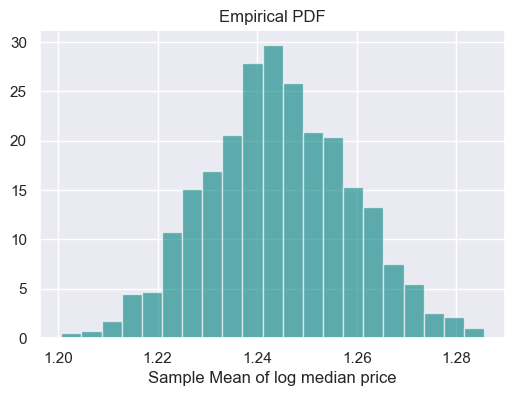

In [15]:
rv_log = np.log(CA_housing.MedInc)
rv_log.replace([np.inf, -np.inf], np.nan, inplace=True) # replace inf values with nan

# Let's generate 2000 random samples of size 1000
sample_size = 1_000
repeat = 2_000
smn=[.0]*repeat # create a list of size 2000 to save sample means
for i in range(repeat):
    smn[i] = rv_log.sample(sample_size,replace=False).dropna().mean()


# show the ditribution of sample mean. What probability distribution does it look like?
plt.figure(figsize=(6,4))
plt.hist(smn,bins=21,density=True,color='teal',alpha=0.6)
plt.xlabel('Sample Mean of log median price')
plt.title('Empirical PDF')

#sns.set_theme(rc={'figure.figsize':(6,4)})

#ax = sns.histplot(data=smn, 
#             kde=True,
#             color='teal')

#ax.set_title('Empirical PDF')
#ax.set_xlabel('Sample Mean of log median price')


plt.show();

## 4.2 Distribution of Sample Variance

Suggested Excercies:
1. define the log value of CA_housing.MedInc as the attribute (parameter) of interest
2. generate 2,000 random samples of log(CA_housing.MedInc), and the size of each sample is 1,000
3. calculate the variance for each sample
4. based on the 2,000 sample means, create a historgram to illustrate the distribution of sample variance.
5. discuss your observations about the sample variance distribution.

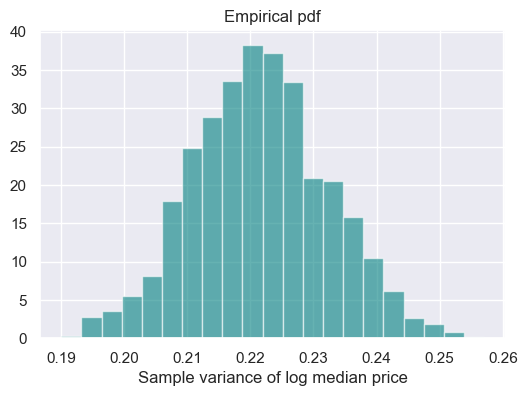

In [16]:
rv_log = np.log(CA_housing.MedInc)
rv_log.replace([np.inf, -np.inf], np.nan, inplace=True)

# Let's generate 2000 random samples of size 1000
sample_size = 1_000
repeat = 2_000   
sv=[0.]*repeat
for i in range(repeat):
  sv[i]=rv_log.sample(sample_size,replace=False).dropna().var()


# show the ditribution of sample variance. What probability distribution does it look like?

plt.figure(figsize=(6,4))
plt.hist(sv,bins=21,density=True,color='teal',alpha=0.6)
plt.xlabel('Sample variance of log median price')
plt.title('Empirical pdf')

## if you use seaborn
#sns.set_theme(rc={'figure.figsize':(6,4)})
#ax = sns.histplot(data=sv, 
#             kde=True,
#             color='teal')
#ax.set_title('Empirical PDF')
#ax.set_xlabel('Sample variance of log median price')

plt.show();

## 4.3 Distribution of Sample Proportion

Suggested Excercies:
1. define the proportion of survey blocks that are "NEAR OCEAN" as the attribute of interest
2. generate 2,000 random samples of CA_housing.OcleanProx, and the size of each sample is 1,000
3. calculate the proportion of "NEAR OCEAN" for each sample
4. based on the 2,000 sample proportions, create a historgram to illustrate the distribution of sample proportion.
5. discuss your observations about the distribution of sample proportions.

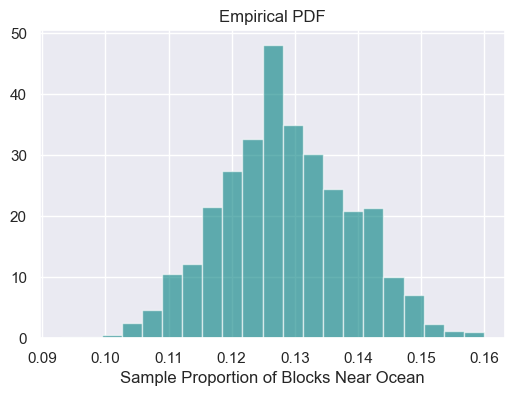

In [17]:
# Let's generate 2000 random samples of size 1000
sample_size = 1_000
repeat = 2_000

spr=[0.]*repeat
for i in range(repeat):
  spr[i]=list(CA_housing.OceanProx.sample(sample_size,replace=False)).count('NEAR OCEAN')/sample_size

# show the ditribution of sample propotion. What distribution does it look like?
plt.figure(figsize=(6,4))
plt.hist(spr,bins=21,density=True,color='teal',alpha=0.6)
plt.xlabel('Sample Proportion of Blocks Near Ocean')
plt.title('Empirical PDF')

## If you use seaborn
#sns.set_theme(rc={'figure.figsize':(6,4)})
#ax = sns.histplot(data=spr,  
#             kde=True,
#             color='teal')
#ax.set_title('Empirical PDF')
#ax.set_xlabel('Sample Proportion of Blocks Near Ocean')


plt.show();

# 5. Interval Estimation

## 5.1 Interval Estimation for Sample Mean

Suggested Exercises:

Let's provide the interval estimate for the mean of log(CA_housing.MedInc) based on a sample of size 1000, which is 95% confident about containing the true mean value.  
1. Define the log value of CA_housing.MedInc as the attribute (parameter) of interest.
2. Generate a sample of size 1,000
3. calculate the sample mean and sample standard deviation
4. Calcualte the t value at 1-alpha/2, where alpha is the level of significance = 0.05. The degree of freedom for the t distribution = sample size -1. 
5. calculate the standard error
6. calculate the margin of error
7. the interval estimation is sample mean +/- margin of error


In [18]:
# log(MedInc) is the variable we would like to study based on a random sample
rv = np.log(CA_housing.MedInc)

N = CA_housing.shape[0]
n = 1000 # sample size
alpha = 0.05 # level of significance
FPC = np.sqrt((N-n)/(N-1))

x = rv.sample(n) # a simple random sample of size n

# sample mean
x_bar = x.mean() # sample mean
print(f'Sample mean is: {x_bar:.3}')

# sample standard deviation
s =x.std()*FPC # sample standard deviation
print(f'Sample standard deviation is {s:.3}')

se = s/np.sqrt(n) # standard error (i.e., the etimated standard deviation of sample mean)
print(f'The standard error (i.e., estimated standard deviation of sample mean) is: {se:.3}')

# t value at 1-alpha/2 and df= n-1 : prob(x<t_val)=1-alpha/2
from scipy.stats import t
df = n-1 # degree of freedom for the standard t distribution = sample size -1
t_val = t(df).ppf(1-alpha/2)
print(f'The t value with {df} degree of freedom at the level of significance {alpha:.2f} is: {t_val:.4f}')

# margin of error
me = t_val*se
print(f'The margin of error is {me:.3}')

print(f'The {1-alpha:.2f} confidence interval for the expected median price is {x_bar+me*np.array([-1,1])}')

Sample mean is: 1.24
Sample standard deviation is 0.448
The standard error (i.e., estimated standard deviation of sample mean) is: 0.0142
The t value with 999 degree of freedom at the level of significance 0.05 is: 1.9623
The margin of error is 0.0278
The 0.95 confidence interval for the expected median price is [1.2116 1.2672]


## 5.2 Interval Estimation of Sample Proportion


Suggested Exercises:

Let's provide the interval estimate for the proportion of survey blocks that are "NEAR OCEAN" based on a sample of size 1000, which is 95% confident about containing the true proportion value.  
1. Define the proportion of survey blocks that are "NEAR OCEAN" as the attribute (parameter) of interest.
2. Generate a sample of size 1,000
3. calculate the sample proportion
4. Calcualte the z value at 1-alpha/2, where alpha is the level of significance = 0.05.  
5. calculate the standard error. 

Suggested Exercises:

Let's provide the interval estimate for the mean of log(CA_housing.MedInc) based on a sample of size 1000, which is 95% confident about containing the true mean value.  
1. Define the log value of CA_housing.MedInc as the attribute (parameter) of interest.
2. Generate a sample of size 1,000
3. calculate the sample mean and sample standard deviation
4. Calcualte the t value at 1-alpha/2, where alpha is the level of significance = 0.05. The degree of freedom for the t distribution = sample size -1. 
5. calculate the standard error [hint: sample standard deviation/sqrt(sample size)]
6. calculate he margin of error
7. the interval estimation is sample mean +/- margin of error. [hint: sqrt(sample proportion*(1-sample proportion)/sample size)]
6. calculate the margin of error
7. the interval estimation is sample proportion +/- margin of error

In [19]:
# let p = the proportion of blocks near ocean. We study this variable using a sample of size 1000

N = CA_housing.shape[0]
n = 1000 # sample size
alpha = 0.05 # level of significance
FPC = np.sqrt((N-n)/(N-1))

X = CA_housing.sample(n,replace=False) # a simple random sample of size n

# sample proportion
p_bar =X['OceanProx'].value_counts()['NEAR OCEAN']/n  # sample proportion
print(f'The sample proportion is: {p_bar:3}')

# sample standard deviation of p
s =np.sqrt(p_bar*(1-p_bar))*FPC # estimated sample standard deviation of x, where x="NEAR OCEAN" with probability p follows Bernoulli distribution
se = s/np.sqrt(n) # standard error (i.e., the estimated standard deviation of sample proportion)
print(f'The standard error is: {se:.3}')

# z value at 1-alpha/2
from scipy.stats import norm
z_val = norm.ppf(1-alpha/2)
print(f'The z value at the level of significane {alpha:.2f} is {z_val:.3f}')

me = se*z_val # margin of error
print(f'The margin of error is {me:.3f}')

print(f'The {1-alpha} confidence interval of the "NEAR OCEAN" blocks in proportion is {p_bar+me.round(3)*np.array([-1,1])}')

The sample proportion is: 0.142
The standard error is: 0.0108
The z value at the level of significane 0.05 is 1.960
The margin of error is 0.021
The 0.95 confidence interval of the "NEAR OCEAN" blocks in proportion is [0.121 0.163]


# 6. Estimation of Nonparametric Distribution

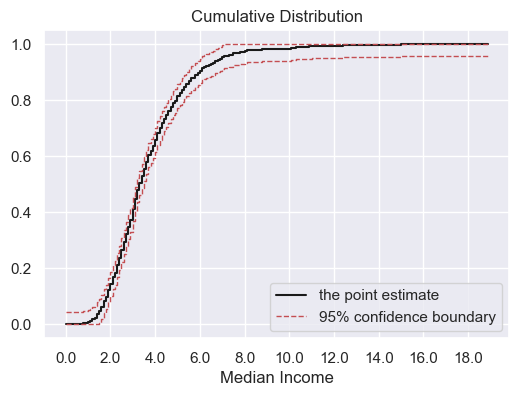

In [20]:
# a random sample of size 1000
sample_size = 1000
MedInc_sample = CA_housing.MedInc.sample(sample_size)

# define  the support for MedInc
stp = 0.1
MedInc_lb = np.floor(MedInc_sample.min()-(MedInc_sample.max()-MedInc_sample.min())*0.01)
MedInc_ub = np.ceil(MedInc_sample.max()*1.2)
MedInc_support = np.arange(MedInc_lb,MedInc_ub,stp)

# initiate CDF of MedInc, and the lower and upper bounds of the confidence interval
F_MedInc = np.empty(len(MedInc_support))
F_MedInc_lb = np.empty(len(MedInc_support))
F_MedInc_ub = np.empty(len(MedInc_support))


# point estimate of CDF
for i in range(len(MedInc_support)):
  F_MedInc[i] = len(MedInc_sample[MedInc_sample<=MedInc_support[i]])/sample_size

# (1-alpha) confidence interval of CDF
alpha = 0.05
se_MedInc = np.sqrt(0.5/sample_size*np.log(2/alpha))

F_MedInc_lb = [max(0,x) for x in F_MedInc-se_MedInc]
F_MedInc_ub = [min(1,x) for x in F_MedInc+se_MedInc]

# visualize the estimation

fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.step(F_MedInc,'k-')
ax.step(F_MedInc_lb,'r--', linewidth=1)
ax.step(F_MedInc_ub,'r--',linewidth=1)
ax.set_xticks(range(0,len(MedInc_support),20))
ax.set_xticklabels(MedInc_support[range(0,len(MedInc_support),20)])
ax.set_xlabel('Median Income')
ax.legend(['the point estimate','95% confidence boundary'])
ax.set_title('Cumulative Distribution')

## If you use seaborn
#ax = sns.lineplot(x=MedInc_support, y=F_MedInc, color='black',drawstyle='steps-pre')
#sns.lineplot(x=MedInc_support, y=F_MedInc_lb,color='red', drawstyle='steps-pre')
#sns.lineplot(x=MedInc_support, y=F_MedInc_ub,color='red', drawstyle='steps-pre')
#ax.set_xlabel('Median Income',fontsize=14)
#ax.legend(['the point estimate','95% confidence boundary'],fontsize=12)
#ax.set_title('Cumulative Distribution',fontsize=16)


plt.show();